OLS Weights:
  b = -200.000
  w1 = 100.000
  w2 = 200.000

Predicted price (Length=3, Width=1): $300.00
Epoch   0: loss=39708.42, w=[8.05666667 5.10833333], b=3.610
Epoch 2000: loss=168.45, w=[ 82.49804681 172.71188962], b=-138.485
Epoch 4000: loss=10.41, w=[ 95.6496926  193.21741221], b=-184.710
Epoch 6000: loss=0.64, w=[ 98.91869646 198.31413381], b=-196.200
Epoch 8000: loss=0.04, w=[ 99.7312334  199.58096454], b=-199.055
Epoch 10000: loss=0.00, w=[ 99.93319592 199.8958454 ], b=-199.765

Final Gradient Descent weights:
  b = -199.942
  w1 = 99.983
  w2 = 199.974

Predicted price (Length=3, Width=1): $299.98


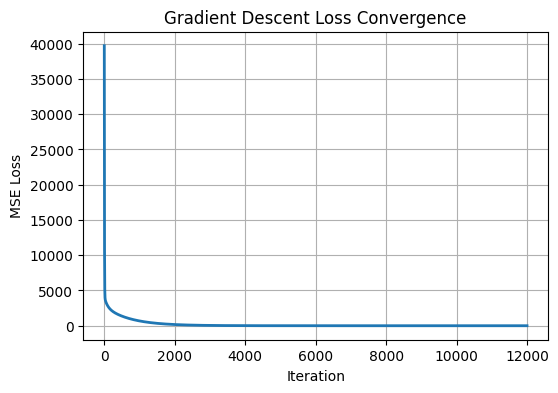

In [ ]:
# ECS 171 – Part III Linear Regression with OLS and Gradient Descent thingie
import numpy as np
import matplotlib.pyplot as plt

X = np.array([ # Matrix of features: Length and Width
    [1.0, 1.0],
    [2.5, 0.5],
    [2.0, 1.5]
])
y = np.array([100, 150, 300])

n, d = X.shape

X_bias = np.c_[np.ones(n), X]  # add bias term

# Normal equation: w = (X^T X)^(-1) X^T y
w_ols = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

b_ols, w1_ols, w2_ols = w_ols
print("OLS Weights:")
print(f"  b = {b_ols:.3f}")
print(f"  w1 = {w1_ols:.3f}")
print(f"  w2 = {w2_ols:.3f}")

# Predict for new sample (Length=3, Width=1)
x_new = np.array([1, 3, 1])   # include bias = 1
y_pred_ols = x_new @ w_ols
print(f"\nPredicted price (Length=3, Width=1): ${y_pred_ols:.2f}")

# Gradient Descent
w = np.ones(d)   # w1=1, w2=1
b = 0.0
eta = 0.01       # learning rate
epochs = 12000   
losses = []

# Gradient descent loop
for epoch in range(epochs):
    # Compute predictions
    y_pred = X @ w + b
    errors = y - y_pred
    
    # Compute gradients
    dw = -(2/n) * (X.T @ errors)
    db = -(2/n) * np.sum(errors)
    
    # Update parameters
    w -= eta * dw
    b -= eta * db
    
    # Compute MSE loss
    loss = np.mean(errors**2)
    losses.append(loss)
    
    if epoch % 2000 == 0:
        print(f"Epoch {epoch:3d}: loss={loss:.2f}, w={w}, b={b:.3f}")

print("\nFinal Gradient Descent weights:")
print(f"  b = {b:.3f}")
print(f"  w1 = {w[0]:.3f}")
print(f"  w2 = {w[1]:.3f}")

# Predict with gradient descent weights
y_pred_gd = b + w[0]*3 + w[1]*1
print(f"\nPredicted price (Length=3, Width=1): ${y_pred_gd:.2f}")

# Visualization
plt.figure(figsize=(6,4))
plt.plot(losses, linewidth=2)
plt.title("Gradient Descent Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()
